## Utiverse~

### 理想火箭方程 Ideal Rocket equation:

$\Delta v = u log_{e}(\frac{m_0}{ m_f})$

$\Delta v$: Change of rocket speed 火箭速度变化  
$u$: Propellant speed 推进剂速度  
$m_0$: Initial mass 初始质量  
$m_f$: Final mass 最终质量  


In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [11]:
# Values from CZ-5
m0 = 4*156  # Four boosters in tons, total mass
m1 = 186    # First stage total mass
m2 = 36     # Second stage total mass
m3 = 8     # Chang-e 5 mass

mp0 = 4*142 # Four boosters in tons, propellant mass
mp1 = 165   # First stage propellant mass
mp2 = 29   # Second stage propellant mass

mp_all = mp0 + mp1 + mp2
m_all = m0 + m1 + m2 + m3

md_all = m_all - mp_all # Total dry mass

print("CZ-5 总质量m0: %d tons" % m_all)
print("CZ-5 总推进剂质量mf: %d tons" % (m_all-md_all))
print("CZ-5 总干重m0: %d tons" % md_all)
print("CZ-5 燃料占比: %.2f %%" % ((m_all-md_all)/m_all*100))

u = 3.1     # Propellant speed km/s

CZ-5 总质量m0: 854 tons
CZ-5 总推进剂质量mf: 762 tons
CZ-5 总干重m0: 92 tons
CZ-5 燃料占比: 89.23 %


In [12]:
# One stage to orbit
mf = m_all - mp0 - mp1 - mp2
dv = u*np.log(m_all/mf)

print("Single stage to orbit dv: %.1f km/s, you need at least 7.9 km/s to get in ideal orbit." % dv)


Single stage to orbit dv: 6.9 km/s, you need at least 7.9 km/s to get in ideal orbit.


In [16]:
# Two stage to orbit
m11 = m_all-mp0
m12 = m_all-m0
mf = m_all-m0-mp1-mp2
dv1 = u*np.log((m_all)/(m11))
dv2 = u*np.log((m12)/(mf))
dv = dv1+dv2

print(dv1,dv2)

print("Two stage to orbit dv: %.1f km/s, you need at least 7.9 km/s to get in ideal orbit." % dv)

3.3912120872030234 5.749137148447965
Two stage to orbit dv: 9.1 km/s, you need at least 7.9 km/s to get in ideal orbit.


In [17]:
# Three stage to orbit
m11 = m_all-mp0
m12 = m_all-m0
m21 = m_all-m0-mp1
m22 = m_all-m0-m1
mf = m_all-m0-m1-mp2

dv1 = u*np.log((m_all)/(m11))
dv2 = u*np.log((m12)/(m21))
dv3 = u*np.log((m22)/(mf))

dv = dv1+dv2+dv3

print(dv1,dv2,dv3)

print("Three stage to orbit dv: %.1f km/s, you need at least 7.9 km/s to get in ideal orbit." % dv)

3.3912120872030234 3.917445320985431 3.336032241729758
Three stage to orbit dv: 10.6 km/s, you need at least 7.9 km/s to get in ideal orbit.


Text(100, 7.7, '最小理想入轨速度 7.9 km/s')

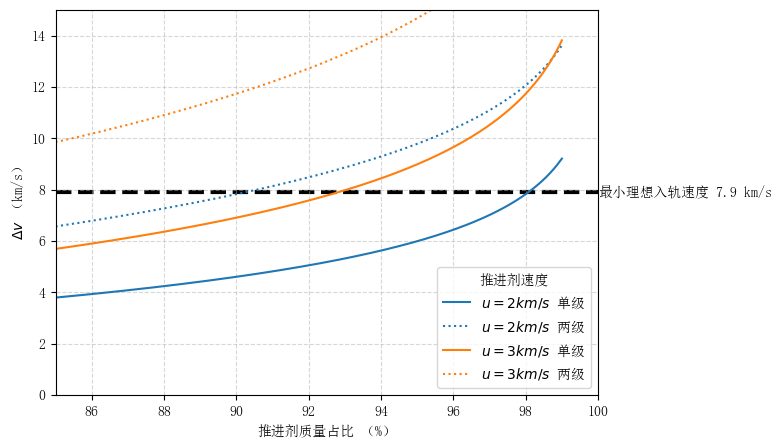

In [6]:
# Make a graph showing difference in one stage and two stage:
plt.rcParams['font.sans-serif'] = ['SimSun']

p2m = np.linspace(0.85,0.99,1000)   # Propellant to mass ratio
us = [2,3]             # Representative propellant speed for solid moter, sea level cryogenic engine and vaccum cryogenic engine, respectively

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)

for i in range(len(us)):
    
    uu = us[i]
    
    dv = uu * np.log(1/(1-p2m))
    ax.plot(p2m*100,dv,
            label="$u = %.0f km/s$ 单级"%uu,
            c=plt.rcParams["axes.prop_cycle"].by_key()['color'][i])
    
    dv = uu * (np.log(1/(1-p2m))+np.log(1/(1-(p2m-0.1)))) # Assume 10% of propellant to weight ratio drop after first stage separation, like CZ5
    ax.plot(p2m*100,dv,
            label="$u = %.0f km/s$ 两级"%uu,
            c=plt.rcParams["axes.prop_cycle"].by_key()['color'][i],
            linestyle=":")

ax.set_xlabel("推进剂质量占比 （%）")
ax.set_ylabel("$\Delta v$ （km/s）")
ax.grid(alpha=0.5,linestyle="dashed")
ax.set_ylim(0,15)
ax.set_xlim(85,100)
ax.legend(title="推进剂速度")

ax.axhline(7.9,linestyle="dashed",c="black",linewidth=3,zorder=0)
ax.text(100,7.9-0.2,"最小理想入轨速度 7.9 km/s")


